In [5]:
#combining all mud log files for one day
import os
import glob
import pandas as pd

#set working directory using \\ (folder)
os.chdir("folder adress") #"...\\Row Data"

#find all csv files in the folder
#use glob pattern matching -> extension = 'csv'
#save result in list -> all_filenames
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#print(all_filenames)

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
#selecting related features, modification of their names and primary preprocessing

import pandas as pd
import numpy as np
row_data = pd.read_csv(r'combined_csv file adress ') #r'...\\Row Data\\combined_csv.csv'
row_data = row_data.rename(columns ={ "'Depth Bit (meas)'":'Bit_depth',"'Depth Hole (meas) '":'HD',"'Hookload (avg) '":'HKL',"'Rotary Torque (surf;avg) '":'Torque',"'Rotary Speed (surf;avg) '":'RPM',
            "'Standpipe Pressure (avg) '":'SPP',"'Rate of Penetration (avg) '":'ROP',"'Weight-on-Bit (surf;avg) '":'WOB',"'Mud Flow In (avg) '":'FR'})
row_data = row_data.iloc[1:,[0,1,3,6,7,9,11,13,14,23]]
dataset = pd.DataFrame(row_data)
dataset.replace('NAN',np.nan, inplace = True)
dataset.isnull().sum()
dataset.dropna(axis=0,inplace = True)
dataset

,DateTime,Bit_depth,HD,ROP,HKL,WOB,Torque,RPM,SPP,FR
1,3/1/2019 12:12:48 AM,3684.5,3883.19995117188,0,307.952940625,0,3363.08428710938,95.0000023841858,889.74813,313.002905622125
2,3/1/2019 12:12:49 AM,3684.5,3883.19995117188,0,307.952940625,0,3062.09217773438,94.0000033378601,890.7478325,313.002905622125
4,3/1/2019 12:12:50 AM,3684.5,3883.19995117188,0,307.154615625,0,3062.09217773438,94.0000033378601,890.7478325,313.002905622125
5,3/1/2019 12:12:51 AM,3684.60009765625,3883.19995117188,0,306.955034375,0,3815.57549804688,94.0000033378601,890.7478325,313.002905622125
7,3/1/2019 12:12:52 AM,3684.60009765625,3883.19995117188,0,307.354196875,0,3815.57549804688,94.0000033378601,890.7478325,313.002905622125
...,...,...,...,...,...,...,...,...,...,...
112367,3/2/2019 12:12:41 AM,3873.39990234375,3883.19995117188,6.10000002197921,325.316440625,0,15606.4366796875,85.0000047683716,0,0
112369,3/2/2019 12:12:42 AM,3873.39990234375,3883.19995117188,6.10000002197921,325.81539375,0,15606.4366796875,85.0000047683716,0,0
112370,3/2/2019 12:12:43 AM,3873.39990234375,3883.19995117188,6.10000002197921,326.114765625,0,16179.3253125,85.0000047683716,0,0
112372,3/2/2019 12:12:44 AM,3873.39990234375,3883.19995117188,6.10000002197921,326.314346875,0,16179.3253125,85.0000047683716,0,0


In [6]:
#turning characteristics to numerical rounded values

dataset["Bit_depth"] = pd.to_numeric(dataset["Bit_depth"], downcast="float")
dataset['Bit_depth'] = dataset['Bit_depth'].apply(np.floor)

dataset["HD"] = pd.to_numeric(dataset["HD"], downcast="float")
dataset['HD'] = dataset['HD'].apply(np.floor)

dataset["ROP"] = pd.to_numeric(dataset["ROP"], downcast="float")
dataset['ROP'] = dataset['ROP'].round(decimals=1)

dataset["HKL"] = pd.to_numeric(dataset["HKL"], downcast="float")
dataset['HKL'] = dataset['HKL'].apply(np.floor)

dataset["WOB"] = pd.to_numeric(dataset["WOB"], downcast="float")
dataset['WOB'] = dataset['WOB'].apply(np.floor)

dataset["Torque"] = pd.to_numeric(dataset["Torque"], downcast="float")
dataset['Torque'] = dataset['Torque'].round(decimals=1)

dataset["RPM"] = pd.to_numeric(row_data["RPM"], downcast="float")
dataset['RPM'] = dataset['RPM'].apply(np.floor)

dataset["SPP"] = pd.to_numeric(dataset["SPP"], downcast="float")
dataset['SPP'] = dataset['SPP'].apply(np.floor)

dataset["FR"] = pd.to_numeric(dataset["FR"], downcast="float")
dataset['FR'] = dataset['FR'].apply(np.floor)

# drop duplicated data
#dataset.drop_duplicates('DateTime',inplace = True)

dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])
print(dataset.describe())

          Bit_depth       HD           ROP           HKL           WOB  \
count  83432.000000  83432.0  83432.000000  83432.000000  83432.000000   
mean    3757.233398   3883.0      4.081021    280.870667      0.069937   
std      111.852219      0.0      2.870445     80.611229      3.335350   
min     3360.000000   3883.0      0.000000     50.000000      0.000000   
25%     3704.000000   3883.0      0.000000    299.000000      0.000000   
50%     3787.000000   3883.0      6.100000    306.000000      0.000000   
75%     3836.000000   3883.0      6.100000    309.000000      0.000000   
max     3883.000000   3883.0      6.100000    611.000000    172.000000   

             Torque           RPM           SPP            FR  
count  83432.000000  83432.000000  83432.000000  83432.000000  
mean    2888.750244     54.286243    713.143494    234.364029  
std     3267.524414     44.118969    435.276276    135.215775  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.

In [7]:
#building daily dataframe

Datetime = pd.Series(pd.date_range("2019-03-01", periods=86400, freq="S"))
data = pd.DataFrame(Datetime, columns = ['DateTime'])
data

,DateTime
0,2019-03-01 00:00:00
1,2019-03-01 00:00:01
2,2019-03-01 00:00:02
3,2019-03-01 00:00:03
4,2019-03-01 00:00:04
...,...
86395,2019-03-01 23:59:55
86396,2019-03-01 23:59:56
86397,2019-03-01 23:59:57
86398,2019-03-01 23:59:58


In [8]:
#filling daily dataframe with existed data

completed_dataset = pd.merge (data, dataset, how = 'left')
completed_dataset

,DateTime,Bit_depth,HD,ROP,HKL,WOB,Torque,RPM,SPP,FR
0,2019-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-01 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
86395,2019-03-01 23:59:55,3878.0,3883.0,6.1,457.0,0.0,0.0,0.0,0.0,0.0
86396,2019-03-01 23:59:56,3879.0,3883.0,6.1,447.0,0.0,0.0,0.0,0.0,0.0
86397,2019-03-01 23:59:57,3879.0,3883.0,6.1,435.0,0.0,0.0,0.0,0.0,0.0
86398,2019-03-01 23:59:58,3880.0,3883.0,6.1,416.0,0.0,0.0,0.0,29.0,0.0


In [9]:
#filling miss data

completed_dataset = completed_dataset.fillna(method='ffill')
completed_dataset.isnull().sum()

DateTime       0
Bit_depth    768
HD           768
ROP          768
HKL          768
WOB          768
Torque       768
RPM          768
SPP          768
FR           768
dtype: int64

In [10]:
#filling miss data

completed_dataset = completed_dataset.fillna(method='bfill')
completed_dataset.isnull().sum()

DateTime     0
Bit_depth    0
HD           0
ROP          0
HKL          0
WOB          0
Torque       0
RPM          0
SPP          0
FR           0
dtype: int64

In [11]:
#providing average data to visual analysis and detecting stuck time

completed_dataset[ '60sec_HKL' ] = completed_dataset.HKL.rolling(60).mean()
completed_dataset[ '60sec_Torque' ] = completed_dataset.Torque.rolling(60).mean()
completed_dataset[ '60sec_RPM' ] = completed_dataset.RPM.rolling(60).mean()

<IPython.core.display.Javascript object>


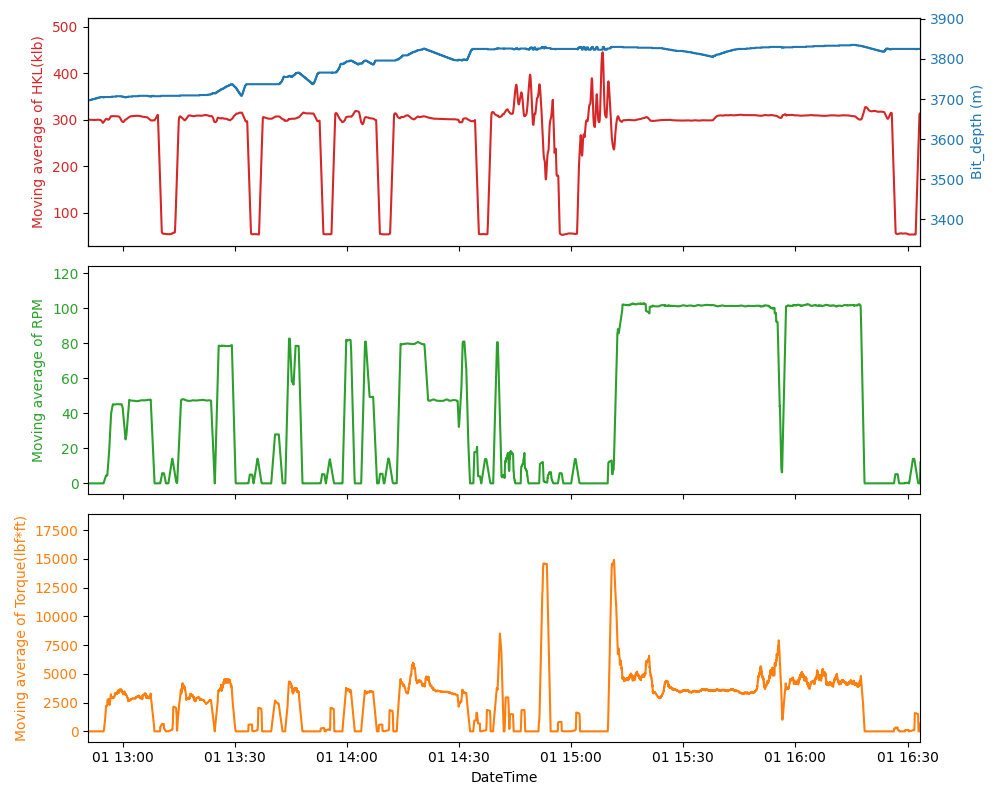

In [24]:
#visualizing key parameters 

import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(3, sharex=True,figsize = ( 10,8))

color = 'tab:red'
ax1[0].set_ylabel('Moving average of HKL(klb)', color=color)
ax1[0].plot('DateTime', '60sec_HKL', data = completed_dataset , color=color)
ax1[0].tick_params(axis='y', labelcolor=color)

ax2= ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Bit_depth (m)', color=color)  # we already handled the x-label with ax1
ax2.plot('DateTime', 'Bit_depth', data = completed_dataset , color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1[1].set_ylabel('Moving average of RPM', color=color)
ax1[1].plot('DateTime', '60sec_RPM', data = completed_dataset , color=color)
ax1[1].tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax1[2].set_xlabel('DateTime')
ax1[2].set_ylabel('Moving average of Torque(lbf*ft)', color=color)
ax1[2].plot('DateTime', '60sec_Torque', data = completed_dataset , color=color)
ax1[2].tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [10]:
#builing 2-hrs dataframe before stuck time

selected_time = pd.Series(pd.date_range("2019-03-01 12:54:00", periods=120, freq="60s"))
selected_time = pd.DataFrame(selected_time, columns = ['DateTime'])
selected_time

,DateTime
0,2019-03-01 12:54:00
1,2019-03-01 12:55:00
2,2019-03-01 12:56:00
3,2019-03-01 12:57:00
4,2019-03-01 12:58:00
...,...
115,2019-03-01 14:49:00
116,2019-03-01 14:50:00
117,2019-03-01 14:51:00
118,2019-03-01 14:52:00


In [11]:
#moving average to remove flactuations

completed_dataset[ '60sec_ROP' ] = completed_dataset.ROP.rolling(60).mean()
completed_dataset[ '60sec_WOB' ] = completed_dataset.WOB.rolling(60).mean()
completed_dataset[ '60sec_SPP' ] = completed_dataset.SPP.rolling(60).mean()
completed_dataset[ '60sec_FR' ] = completed_dataset.FR.rolling(60).mean()
selected_data = completed_dataset[['DateTime','60sec_HKL', '60sec_ROP', '60sec_WOB', '60sec_RPM',
       '60sec_SPP', '60sec_FR','60sec_Torque']]
selected_data

,DateTime,60sec_HKL,60sec_ROP,60sec_WOB,60sec_RPM,60sec_SPP,60sec_FR,60sec_Torque
0,2019-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03-01 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-03-01 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-01 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
86395,2019-03-01 23:59:55,378.483333,6.1,0.0,0.0,9.666667,0.0,0.0
86396,2019-03-01 23:59:56,377.666667,6.1,0.0,0.0,9.666667,0.0,0.0
86397,2019-03-01 23:59:57,376.633333,6.1,0.0,0.0,9.183333,0.0,0.0
86398,2019-03-01 23:59:58,375.283333,6.1,0.0,0.0,9.183333,0.0,0.0


In [12]:
#filling 2-hrs dataframe with related data

semifinal_dataset = pd.merge(selected_time, selected_data, how = 'left')
semifinal_dataset['60sec_ROP'] = 0
semifinal_dataset

,DateTime,60sec_HKL,60sec_ROP,60sec_WOB,60sec_RPM,60sec_SPP,60sec_FR,60sec_Torque
0,2019-03-01 12:54:00,299.400000,0,0.0,0.000000,795.233333,296.833333,0.000000
1,2019-03-01 12:55:00,295.650000,0,0.0,0.600000,784.733333,296.050000,95.546670
2,2019-03-01 12:56:00,300.716667,0,0.0,6.950000,788.333333,296.966667,2755.261658
3,2019-03-01 12:57:00,307.150000,0,0.0,40.700000,792.900000,297.833333,2934.525016
4,2019-03-01 12:58:00,307.333333,0,0.0,45.066667,789.800000,297.400000,3279.166638
...,...,...,...,...,...,...,...,...
115,2019-03-01 14:49:00,396.333333,0,0.0,0.000000,27.066667,0.000000,0.000000
116,2019-03-01 14:50:00,293.966667,0,0.0,0.000000,33.100000,0.000000,0.000000
117,2019-03-01 14:51:00,347.083333,0,0.0,0.000000,35.916667,0.000000,0.000000
118,2019-03-01 14:52:00,330.416667,0,0.0,11.616667,29.733333,0.000000,7855.428281


In [13]:
#providing inclination and DLS data using interpolation and survey data

depth_dataset = pd.merge(selected_time, dataset , how = 'left')
depth_dataset = depth_dataset[['DateTime','Bit_depth']]
depth_dataset.fillna(method='ffill',inplace = True)
depth_dataset['inc'] = np.nan
depth_dataset['DLS'] = np.nan
depth_dataset.loc[-1] = [np.nan, 3696.6, 39.2 , 0.593]
depth_dataset.loc[120] = [np.nan, 3831.1,  44.5, 0.22]

depth_dataset.sort_index(inplace=True)
depth_dataset.set_index('Bit_depth',inplace = True)

depth_dataset.interpolate(method = 'index', inplace = True)
depth_dataset

,DateTime,inc,DLS
Bit_depth,,,
3696.6,NaT,39.200000,0.593000
3704.0,2019-03-01 12:54:00,39.491599,0.572478
3704.0,2019-03-01 12:55:00,39.491599,0.572478
3705.0,2019-03-01 12:56:00,39.531004,0.569705
3705.0,2019-03-01 12:57:00,39.531004,0.569705
...,...,...,...
3827.0,2019-03-01 14:50:00,44.338439,0.231370
3824.0,2019-03-01 14:51:00,44.220223,0.239690
3827.0,2019-03-01 14:52:00,44.338439,0.231370


In [14]:
#Adding inclination and DLS to 2-hrs dataframe

final_dataset = pd.merge(semifinal_dataset, depth_dataset, how = 'left')
final_dataset

,DateTime,60sec_HKL,60sec_ROP,60sec_WOB,60sec_RPM,60sec_SPP,60sec_FR,60sec_Torque,inc,DLS
0,2019-03-01 12:54:00,299.400000,0,0.0,0.000000,795.233333,296.833333,0.000000,39.491599,0.572478
1,2019-03-01 12:55:00,295.650000,0,0.0,0.600000,784.733333,296.050000,95.546670,39.491599,0.572478
2,2019-03-01 12:56:00,300.716667,0,0.0,6.950000,788.333333,296.966667,2755.261658,39.531004,0.569705
3,2019-03-01 12:57:00,307.150000,0,0.0,40.700000,792.900000,297.833333,2934.525016,39.531004,0.569705
4,2019-03-01 12:58:00,307.333333,0,0.0,45.066667,789.800000,297.400000,3279.166638,39.570409,0.566932
...,...,...,...,...,...,...,...,...,...,...
115,2019-03-01 14:49:00,396.333333,0,0.0,0.000000,27.066667,0.000000,0.000000,44.338439,0.231370
116,2019-03-01 14:50:00,293.966667,0,0.0,0.000000,33.100000,0.000000,0.000000,44.338439,0.231370
117,2019-03-01 14:51:00,347.083333,0,0.0,0.000000,35.916667,0.000000,0.000000,44.220223,0.239690
118,2019-03-01 14:52:00,330.416667,0,0.0,11.616667,29.733333,0.000000,7855.428281,44.338439,0.231370


In [15]:
#Final dataset

final_dataset.drop('DateTime',axis = 1, inplace = True)
final_dataset

,60sec_HKL,60sec_ROP,60sec_WOB,60sec_RPM,60sec_SPP,60sec_FR,60sec_Torque,inc,DLS
0,299.400000,0,0.0,0.000000,795.233333,296.833333,0.000000,39.491599,0.572478
1,295.650000,0,0.0,0.600000,784.733333,296.050000,95.546670,39.491599,0.572478
2,300.716667,0,0.0,6.950000,788.333333,296.966667,2755.261658,39.531004,0.569705
3,307.150000,0,0.0,40.700000,792.900000,297.833333,2934.525016,39.531004,0.569705
4,307.333333,0,0.0,45.066667,789.800000,297.400000,3279.166638,39.570409,0.566932
...,...,...,...,...,...,...,...,...,...
115,396.333333,0,0.0,0.000000,27.066667,0.000000,0.000000,44.338439,0.231370
116,293.966667,0,0.0,0.000000,33.100000,0.000000,0.000000,44.338439,0.231370
117,347.083333,0,0.0,0.000000,35.916667,0.000000,0.000000,44.220223,0.239690
118,330.416667,0,0.0,11.616667,29.733333,0.000000,7855.428281,44.338439,0.231370


In [ ]:
#Adopting to ts_fresh package

final_dataset["id"] = 1
final_dataset["time"] = np.arange(len(final_dataset))
final_dataset = final_dataset[["id", "time", "60sec_HKL","60sec_Torque","60sec_RPM","60sec_SPP","60sec_ROP","60sec_WOB","60sec_FR","inc","DLS"]]
final_dataset

In [22]:
#Exporting the related case

writer = pd.ExcelWriter('...\2-hrs-case1.xlsx',engine='xlsxwriter')
final_dataset.to_excel(writer, sheet_name='Sheet1')
writer.save()